In [47]:
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [48]:
#load the 10,000 companies dataset
train = pd.read_csv('/Users/irislu/Downloads/capstone1 bankruptcy/train 10000/bankruptcy_Train 2.csv')

In [49]:
train.head()


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [50]:
# 203 out of 10,000 companies are bankrupted
train['class'].value_counts()


0    9797
1     203
Name: class, dtype: int64

In [63]:
#caculate z-score to spot the outliers for the whole dataset other than the target
z_score = train.copy()
for col in z_score.columns[:-1]:
    z_score[col] = np.abs(stats.zscore(z_score[col]))
z_score

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.028287,0.059723,0.036166,0.020412,0.008671,0.013603,0.004743,0.593954,0.644797,0.084797,...,0.262731,0.000347,0.168150,0.039109,0.050978,0.195379,0.025430,0.174590,0.045984,0
1,0.171651,0.030019,0.303242,0.094694,0.008749,0.013603,0.019824,0.061686,0.395386,0.047114,...,0.075519,0.018915,0.041526,0.043757,0.030377,0.187966,0.029971,0.084122,0.024979,0
2,0.047664,0.051229,0.477486,0.214206,0.008073,0.013603,0.001422,0.437197,0.225070,0.055954,...,0.058456,0.002186,0.012015,0.011268,0.038326,0.004618,0.017571,0.280125,0.031795,0
3,0.055381,0.036741,0.175431,0.159737,0.008722,0.009615,0.000966,0.443476,0.250618,0.065887,...,0.050630,0.000244,0.041720,0.008641,0.037825,0.311544,0.035464,0.516027,0.046022,0
4,0.163621,0.031767,0.671511,0.021681,0.009010,0.013603,0.045581,0.082800,0.355758,0.049332,...,0.067115,0.027951,0.049958,0.042559,0.032287,0.167268,0.031590,0.043575,0.021175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.062655,0.029768,0.481108,0.214629,0.008155,0.006154,0.001146,0.360580,0.323435,0.029536,...,0.014365,0.003063,0.001484,0.028998,0.038345,0.285489,0.035445,0.515983,0.042651,0
9996,0.063738,0.062524,0.184856,0.017924,0.008736,0.028308,0.001930,0.639477,0.341448,0.082259,...,0.032304,0.003789,0.013412,0.040898,0.036359,0.057344,0.038737,0.228421,0.039306,0
9997,0.170822,0.048590,0.814512,0.250423,0.008177,0.011811,0.024955,0.451799,0.306189,0.065037,...,0.002126,0.042099,0.009479,0.014455,0.034557,0.226219,0.005886,0.434644,0.039116,0
9998,0.083153,0.026015,0.104352,0.052531,0.009185,0.015411,0.004659,0.342783,0.416388,0.023968,...,0.012029,0.007858,0.024871,0.005383,0.021278,0.267335,0.024281,0.193306,0.042636,0


In [66]:
#find where z-scores are over 3, which means it is more than normal away from the mean
#outlier contains arrays of rows and colums as positions in the dataframe
outlier=np.where(z_score>3)
outlier

(array([   6,    8,   13, ..., 9984, 9984, 9985]),
 array([54, 58, 19, ..., 45, 62, 28]))

In [53]:
# this shows that 519 companies have more than one attributes that are outliers
len(np.unique(outlier[0][pd.DataFrame(a[0]).duplicated()]))

519

In [54]:
# there are 1038 compnaies out of 10,000 that have outliers
len(np.unique(outlier[0]))

1038

In [55]:
# we want to see if the outliers caused by the bankruptcy of companies 
# only 22 of the 519 companies bankrupted
c= np.unique(outlier[0])
d=[]
for i in c:
    if train.loc[i,'class']==1:
        d.append(i)
len(d)

22

In [58]:
#top 50 companies that have the most outliers
dd = Counter(outlier[0]).most_common(50)
dd

[(6423, 25),
 (6779, 20),
 (181, 14),
 (1470, 13),
 (7665, 13),
 (953, 12),
 (2943, 12),
 (5267, 12),
 (8652, 12),
 (3345, 11),
 (4360, 11),
 (821, 10),
 (4135, 10),
 (5395, 10),
 (7899, 10),
 (9777, 10),
 (2508, 9),
 (2885, 9),
 (3075, 9),
 (3954, 9),
 (4237, 9),
 (4322, 9),
 (4380, 9),
 (5787, 9),
 (154, 8),
 (917, 8),
 (1127, 8),
 (2028, 8),
 (5306, 8),
 (5978, 8),
 (6141, 8),
 (6157, 8),
 (6889, 8),
 (8046, 8),
 (9104, 8),
 (9198, 8),
 (9905, 8),
 (477, 7),
 (557, 7),
 (2921, 7),
 (3767, 7),
 (4340, 7),
 (4519, 7),
 (4583, 7),
 (4814, 7),
 (6224, 7),
 (8371, 7),
 (8955, 7),
 (9136, 7),
 (470, 6)]

In [64]:
#see how many got bankraupted within these top 50 companies
cc=[]
for i in range(50):
    if z_score.loc[dd[i][0],'class']==1:
        cc.append(i)
len(cc)

0

In [65]:
#all the attrubutes have outliers
len(np.unique(outlier[1]))

64

In [45]:
#top 25 attributes that have the most outliers
Counter(outlier[1]).most_common(25)

[(15, 181),
 (25, 177),
 (49, 170),
 (16, 153),
 (7, 150),
 (54, 137),
 (33, 132),
 (35, 116),
 (62, 85),
 (32, 80),
 (2, 79),
 (47, 74),
 (8, 69),
 (50, 69),
 (28, 57),
 (60, 55),
 (34, 53),
 (11, 52),
 (39, 45),
 (45, 41),
 (3, 37),
 (10, 35),
 (40, 34),
 (21, 30),
 (52, 24)]

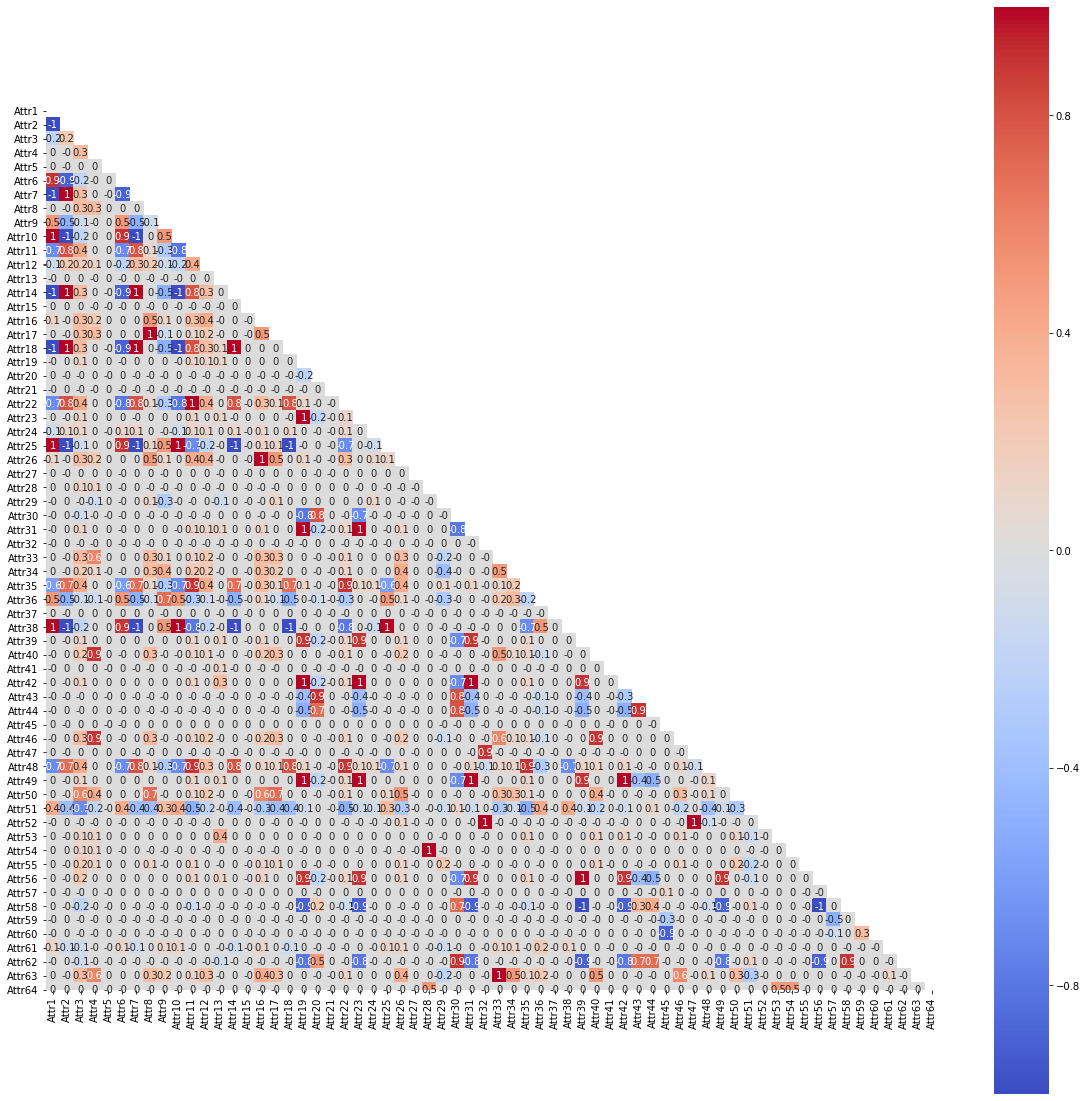

In [20]:
#let's see the correlation between the attributes to see if there are strong relationship between the variables
corr = round(train.iloc[:,:-1].corr(),1)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='coolwarm',ax=ax)
plt.show()
fig.savefig('heatmapplot.png')

In [26]:
#Use Anova f-test to see which attributes have the strongest relationship with the target
array = train.values
X = array[:,0:64]
Y = array[:,64]
test = SelectKBest(score_func=f_classif, k=25)
fit = test.fit(X, Y)

set_printoptions(precision=3)
print(fit.scores_)

[2.871e+00 6.440e-01 5.693e+01 6.971e+00 1.314e-02 2.043e-01 1.898e-02
 2.035e+01 6.488e+00 7.958e-01 1.904e+01 8.505e+00 3.690e-02 1.899e-02
 3.760e-02 5.108e+01 2.231e+01 2.281e-02 3.027e-01 5.946e-02 7.141e-02
 2.304e+01 2.683e-01 2.095e-02 1.012e+01 5.162e+01 2.573e-02 9.827e-03
 1.662e+01 1.933e-02 2.593e-01 1.911e-03 1.043e+01 1.006e+01 4.584e+01
 1.231e-01 6.667e-03 3.532e-01 9.392e-01 2.828e+00 1.203e-01 2.328e-01
 1.298e-03 5.309e-02 6.816e-03 7.347e+00 5.058e-02 8.460e+00 1.230e-01
 2.876e+01 5.587e+01 5.404e-04 2.841e-02 1.338e-02 6.192e+00 5.324e-02
 6.149e-01 4.522e-02 7.483e-02 1.051e-01 5.991e-02 2.176e-02 1.501e+01
 1.026e-01]


In [27]:
#find out the top 25 that has the strongest relationship witht the target
res = sorted(range(len(fit.scores_)), key = lambda sub: fit.scores_[sub])[-25:]
res_ = sorted(res)
res_

[0,
 2,
 3,
 7,
 8,
 9,
 10,
 11,
 15,
 16,
 21,
 24,
 25,
 28,
 32,
 33,
 34,
 38,
 39,
 45,
 47,
 49,
 50,
 54,
 62]

In [68]:
# 21 of out of the 25 attributes match with the top list of attributes that have the most outliers, meaning the
#outliers may be a key in interpreting the target
len(set(res_).intersection([x[0] for x in Counter(outlier[1]).most_common(25)]))

21

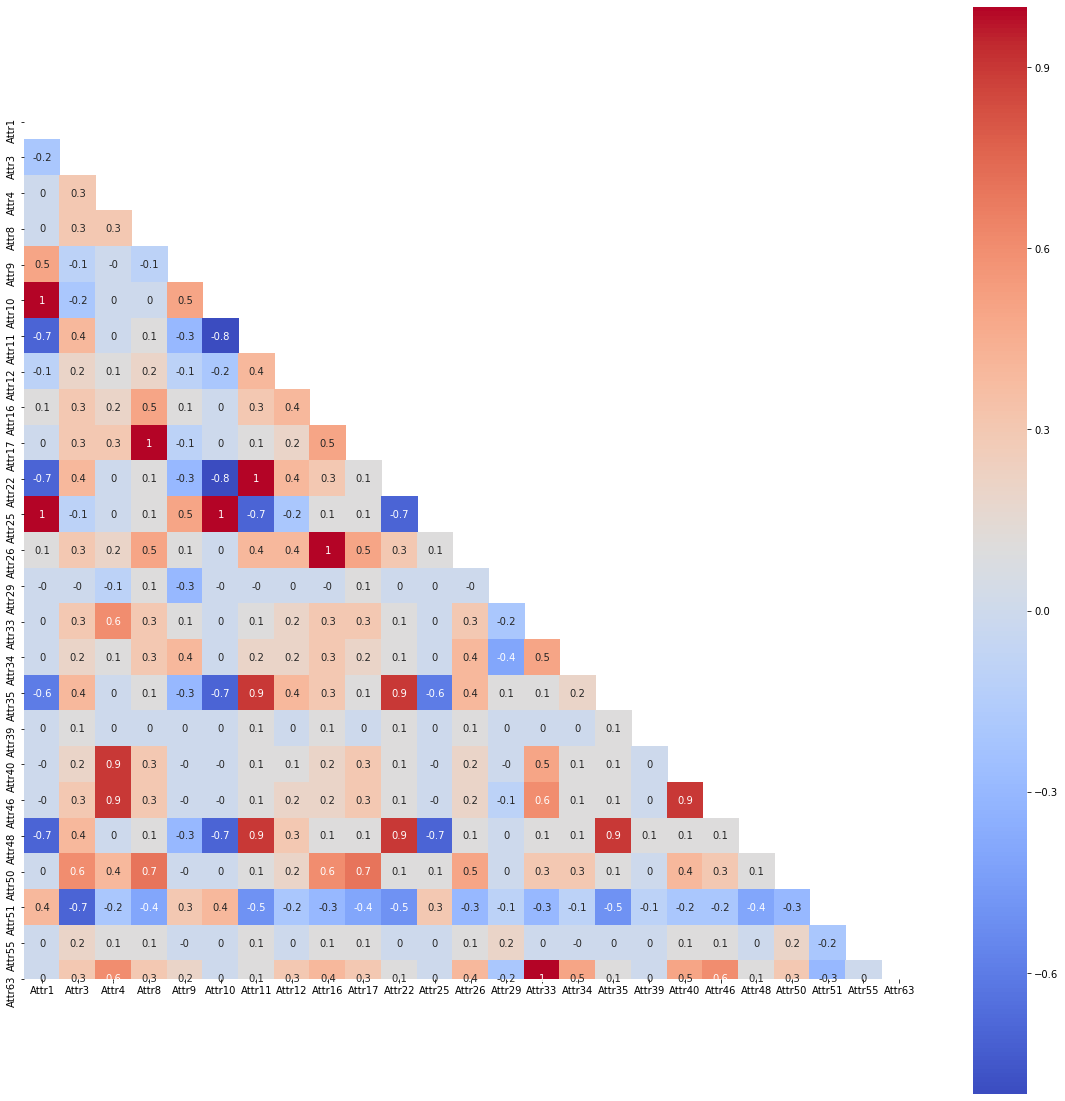

In [28]:
#put these 25 attributes into heatmap to learn their correlations
corr = round(train.iloc[:,res_].corr(),1)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(corr, mask=mask,square=True,annot=True,cmap='coolwarm',ax=ax)
plt.show()